# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")


import warnings
warnings.filterwarnings("ignore")

***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

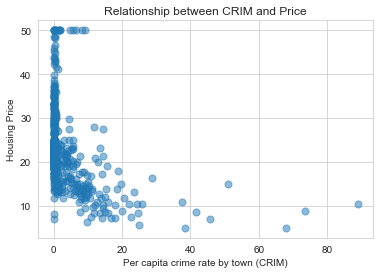

In [12]:
plt.scatter(bos.CRIM, bos.PRICE, s = 50, alpha = .5)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

#### your turn: describe relationship
I see a negative non-linear relationship. It is interesting that near a 0 Crime Rate, there becomes a wide range of housing prices encomopassing the near full range of prices. This range extends until about a CRIM of 10. I would investiage these data to verify no missing or incorrect data.
I would also take a look at the data points that have a CRIM rate above 45 these may be outliers from looking at their placement in relationship the the rest of the data


Text(0.5, 1.0, 'Relationship between RM and Price')

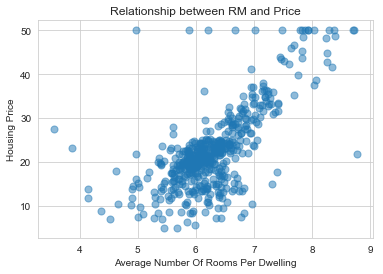

In [13]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE, alpha = .5,s =50)
plt.xlabel("Average Number Of Rooms Per Dwelling")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

There appears to be a positive linear relationship of price and average number of rooms. There appear to be a few outliers. At the top of the plot near a housing price of 50, we see a wide range of rooms per dwelling. This could be due to location of where these houses are located, for example a house located in a more 'downtown' area near shops may be more expensive than a house with the same number of rooms further away or in a different neighborhood. 


Text(0.5, 1.0, 'Relationship between RM and Price')

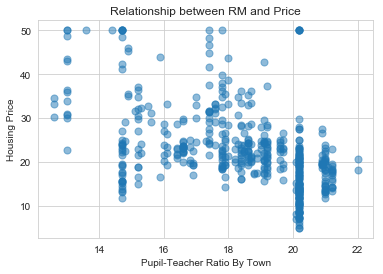

In [14]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE, alpha = .5, s = 50)
plt.xlabel("Pupil-Teacher Ratio By Town")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")




There is a negative correlation between price and the pupil teacher ratio. There a few outliers of mid ranged pricing for the lowest pupil teacher ratio. It may be worth checking the data here. It is interesting that with a pupil teacher ratio of > 20-21 the housing prices start to decrease for the remaining data. 

In [15]:
#create a function to calculate the correlation coefficient between 2 arrays
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [16]:
#create & transpose the df into a numpy array to use the correlation function
n_bos = np.transpose(bos.values)
#add the price array to it's own variable
n_price = n_bos[13]
#drop the price array from the numpy array
n_bos = np.delete(n_bos,13,0)

In [17]:
corr = np.empty(len(n_bos))
for i in range(len(n_bos)):
    corr[i] = pearson_r(n_bos[i], n_price)

dcorr = pd.DataFrame(corr).transpose()
dcorr.columns = bos.columns[:13]
dcorr


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.388305,0.360445,-0.483725,0.17526,-0.427321,0.69536,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663


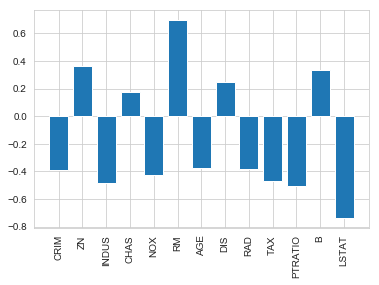

In [18]:
plt.bar( dcorr.columns, corr)
_=plt.xticks(np.arange(13),bos.columns, rotation = 90)


From the correlations above the corresponding bar chart, you can see that RMs, ZN & B have the highest positive correlation to housing while LSTAT, PTRATIO, TX & INDUS have the highest negative correlation.

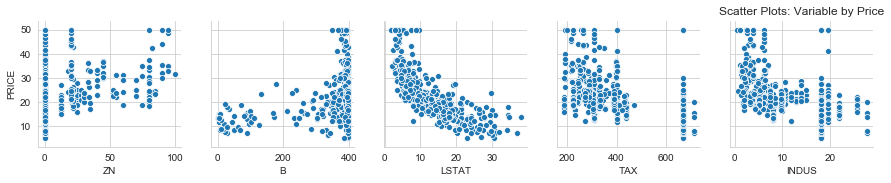

In [19]:

#create scatter plots of the variables mentioned above| ZN, B, LSTAT, TAX & INDUS
s_bos = bos[['ZN', 'B', 'LSTAT','TAX','INDUS','PRICE']]
sns.pairplot(s_bos,x_vars=['ZN','B','LSTAT','TAX','INDUS'], y_vars = ['PRICE'])
_=plt.title('Scatter Plots: Variable by Price')




**ZN** is described as **proportion of residential land zoned for lots over 25,000 sq.ft.** there is a positive linear relationship with this variable. This makes sense as a higher proportion of **ZN** would equate to more land and a higher price for the dwelling.  Though we can see at a **ZN** of 0, there is a wide range of prices. Houses in more dense areas such as downtown areas may be smaller and thus cost more as they are more convenient.

**B** is described as **1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town**. There is a positive linear relationship with this variable. For small percentages of blacks in a town, the higher the price of a house. For higher populations of blacks, the lower the house values. At larger values of **B** there is a wide range of values. 

**LSTAT** is described as **% lower status of the population** there is a strong linear negative correlation with this variable.

**TAX** **full-value property-tax rate per 10,000USD** there is a negative linear correlation with this variable. The housing prices go down when full value tax rate increases. There is an outlier at the >600 TAX rate figure. For 

**INDUS** **proportion of non-retail business acres per town** there is a negative linear relationship with this variable. Suggesting that where more retail businesses are located, the higher the price of a house. There are a few outliers near the **INDUS** = 20 range. This could be due to higher cost spread out neighborhoods, some inquirty into these outliers could explain.


### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

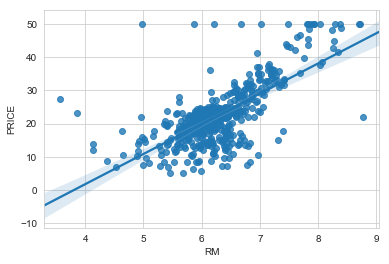

In [20]:
_=sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


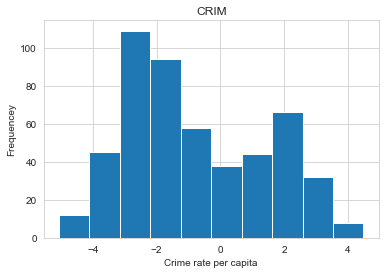

In [21]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

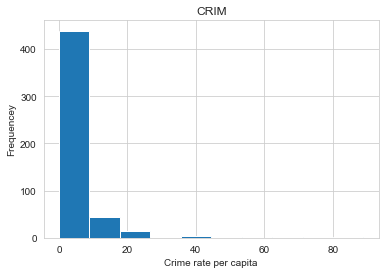

In [22]:
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

The purpose of taking the log was to rescale the data. When looking at the original histogram, the data is highly skewed. Using the log function unskews the data, we can see that the data has two peaks,something we could not see without taking the log.


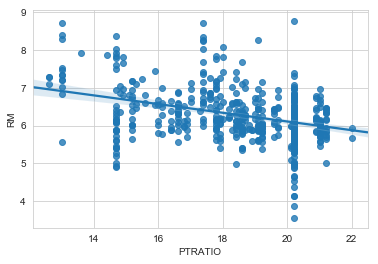

In [23]:
_=sns.regplot(y="RM", x="PTRATIO", data=bos, fit_reg = True)

There is a slight negative linear correlation between the **PTRATIO** and **RM**. 

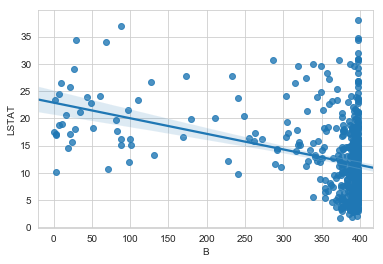

In [24]:
_=sns.regplot(y="LSTAT", x="B", data=bos, fit_reg = True)

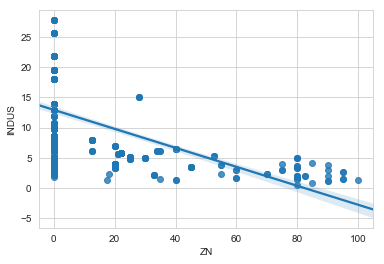

In [25]:
_=sns.regplot(y="INDUS", x="ZN", data=bos, fit_reg = True)

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [26]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [27]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           2.49e-74
Time:                        16:50:00   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

Text(0.5, 1.0, 'Relationship between Predicted and Original Housing Prices')

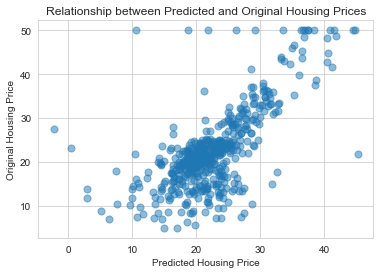

In [28]:
plt.scatter(m.fittedvalues, bos.PRICE, s = 50, alpha = .5)
plt.xlabel("Predicted Housing Price")
plt.ylabel("Original Housing Price")
plt.title("Relationship between Predicted and Original Housing Prices")

Many scatter plot shows a strong correlation between the two points, which is to be expeted from the model. There seems to be a predicted price that is below 0, and one very near 0. There are also instances where a few of the highest original price houses were predicted to be much lower, the ceiling effect previously mentioned.

### Fitting Linear Regression using `sklearn`


In [29]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [30]:
# Look inside lm object
# I am not able to get an output until the model is fit

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [31]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


- To change the model to not fit an intercept term, I would adjust the LinearRegression object with the ***fit_intercept=False*** argument.  I would not recommend getting rid of the intercept. When the interecept is removed the data is expected to be centered, and because the data is not centered it would not be the best fit for the data. 


- The three assumptions of the residuals are that they are indepenent, have a constant variance and are normally distributed. If they are iid then the first two conditions are met. From data that is normally distributed, you could have subsets that are dependent but be normally distibuted.

- **False** The error terms need to be normally distributed, but the dependent variable Y does not

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [32]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838509015


In [33]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [34]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [35]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

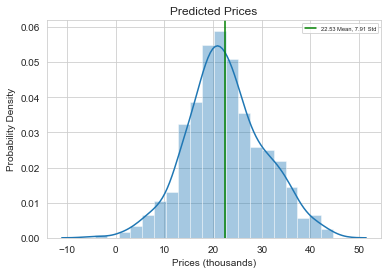

In [36]:
pred = lm.predict(X)
pred_mean = np.mean(pred)
pred_std = np.std(pred)
sns.distplot(pred)
plt.axvline(x=pred_mean, color = 'green', label = '{0:2.2f} Mean, {1:2.2f} Std'.format(pred_mean, pred_std))
plt.legend(fontsize = 'xx-small', loc='upper right')
plt.title("Predicted Prices")
plt.xlabel("Prices (thousands)")
plt.ylabel("Probability Density")

plt.show()

The shape is somewhat normal, as the data is centered around the middle. The mean of the data is **22.53** and the standard deviation is **7.91**. There is some ketosis, you can see that there are more values distributed in the 25-35 range, than on the opposite side of the curve causing the mean to move to right.

There is one outlier that you can see below in the quantile-quantile plot, that shows a negative prediction. We can investigate these outliers and determine if we can remove it from the data. If the features of this datapoint show a value out of the ordinary we can remove this value, a house will not have a negative value.

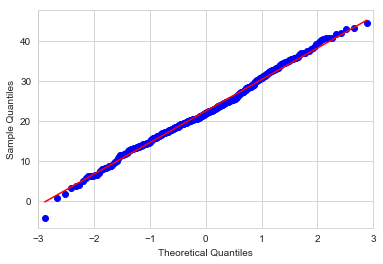

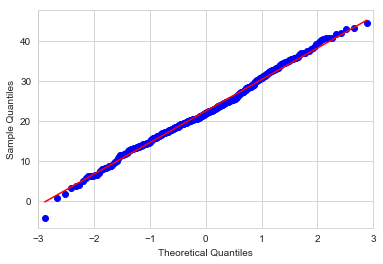

In [37]:
from statsmodels.graphics.gofplots import qqplot
qqplot(pred, line = 's')

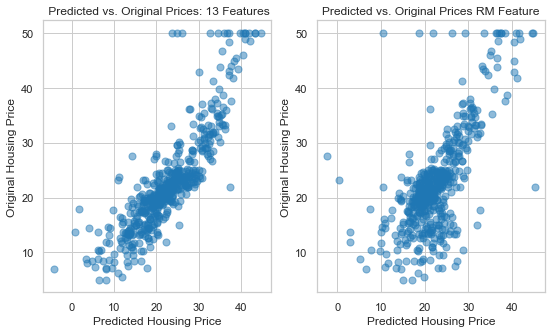

In [38]:
sns.set_context('notebook')
plt.figure(figsize = (9,5))
plt.subplot(1,2,1)
plt.scatter(pred, bos.PRICE, s = 50, alpha = .5)
plt.xlabel("Predicted Housing Price")
plt.ylabel("Original Housing Price")
plt.title(" Predicted vs. Original Prices: 13 Features")

plt.subplot(1,2,2)
plt.scatter(m.fittedvalues, bos.PRICE, s = 50, alpha = .5)
plt.xlabel("Predicted Housing Price")
plt.ylabel("Original Housing Price")
plt.title("Predicted vs. Original Prices RM Feature")
plt.show()

We see a similar plot compared to the previous model with the **RM** feature. The spread of data, particularly near the lower prices (lower left) are more aligned.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [39]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [40]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31637.510837065056


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

**sklearn** intercept & coefficient

In [41]:
X_ptr = bos[['PTRATIO']]
X_ptr = np.reshape(X_ptr,(-1,1))
# This creates a LinearRegression object
lm_pt = LinearRegression()
lm_pt.fit(X_ptr, bos.PRICE)

#Explained Sum of Squares 'ESS'
ESS = np.sum((lm_pt.predict(X_ptr) - np.mean(bos.PRICE)) ** 2)
#Total sum of squares
TSS = np.sum((bos.PRICE**2) - np.mean(bos.PRICE)**2)
#R2 = ESS / TSS
R2 = ESS / TSS

MSE = np.mean(np.sum((bos.PRICE - lm_pt.predict(X_ptr))**2))

#F-statistic explained variation (R2) /  (1-unexplained variation / n)
F_stat = (R2 / ((1-R2) / len(bos.PRICE)))

#t-statistic = b - B0 / SE or because we are assuming beta = 0, the coefficient of the feature / std error
t_stat = lm_pt.coef_[0] / .163

print('t-Statistic: {}'.format(t_stat))
print('F-Statistic: {}'.format(F_stat))
print('R2: {}'.format(R2))
print('Estimated intercept coefficient: {}'.format(lm_pt.intercept_))
print('Estimated PTRATIO coefficient: {}'.format(lm_pt.coef_[0]))

t-Statistic: -13.234204270312667
F-Statistic: 175.80040614107827
R2: 0.25784731800922633
Estimated intercept coefficient: 62.34462747483265
Estimated PTRATIO coefficient: -2.1571752960609647


**statsmodel** intercept & coefficient

In [42]:
m_1 = ols('PRICE ~ PTRATIO',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           2.49e-74
Time:                        16:50:09   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

- The intercept is **62.3K**, this is predicted price of a house when the **PTRATIO** feature is zero. The coefficient is **-2.2** means that for every unit increase in the **PTRATIO** would equate to a 2.2K drop in housing price. The confidence level gives us a range of plausible values we can see in this change; about 2.4K to 1.8K. 

- The ***R<sup>2</sup>*** value is **0.26**. It is defined as ***R<sup>2</sup> = Explained Variation / Total Variation***  This is a measure of how close the data are to the fitted regression line, it explains all the variability of the response data around the mean. This would indicate that the above model accounts for **26%** of the variance of the data. The more variance that is account for the by the regression model the closer the data poitns will fall on the fitted regression line. This is a somewhat low ***R<sup>2</sup>*** value which tells me that there is high variability around the regression line, however paired with the low p-value, this tells me that there is a significant trend in the data.

- The ***F-statistic*** is **175.1**, with a **p-value** of ***1.6e-34***. While the ***R<sup>2</sup>*** value measures the strength of the relationship between the feature and the dependent variable, the***F-statistic*** gives the ability to judge whether that relationship is stastistically significant. In this case, with a low **p-value** we can feel confident that **PTRATIO** is a significant indicator of price.

-  The relationship between the ***t-statistic*** & the ***F-statistic*** here is ***t-statistic<sup>2</sup> = F-Statistic***. **-13.233<sup>2</sup> = 175.1**. 


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

**sklearn**

In [43]:
X_3 = bos[['CRIM', 'RM', 'PTRATIO']]
# This creates a LinearRegression object
lm_3 = LinearRegression()
lm_3.fit(X_3, bos.PRICE)

#Explained Sum of Squares 'ESS'
ESS = np.sum((lm_3.predict(X_3) - np.mean(bos.PRICE)) ** 2)
#Total sum of squares
TSS = np.sum((bos.PRICE**2) - np.mean(bos.PRICE)**2)
#R2 = ESS / TSS
R2 = ESS / TSS

MSE = np.mean(np.sum((bos.PRICE - lm_3.predict(X_3))**2))

#F-statistic explained variation (R2) /  (1-unexplained variation / n) OR (R2 / 1-R2) * (N - K - 1 / K)
F_stat = (R2 / (1-R2)) * ((len(X_3)-len(X_3.columns) - 1)/len(X_3.columns))


print('F-Statistic: {}'.format(F_stat))
print('R2: {}'.format(R2))
print('Estimated intercept coefficient: {}'.format(lm_3.intercept_))
pd.DataFrame({'features': X_3.columns, 'estimatedCoefficients': lm_3.coef_})[['features', 'estimatedCoefficients']]

F-Statistic: 245.16449030065414
R2: 0.5943412940723549
Estimated intercept coefficient: -3.3707043351542687


,features,estimatedCoefficients
0,CRIM,-0.204961
1,RM,7.380411
2,PTRATIO,-1.069546


**statsmodel**

In [44]:
# Regression using 3 variable, CRIM, RM, PTRATIO
m_3 = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()
print(m_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           6.15e-98
Time:                        16:50:09   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

- The ***F-statistic*** is **245** with a very low ***p value***. This tells me that the model is statistically significant from a model where the coefficients are zero (that they do NOT predict the housing cost). Because the p value is low, we can reject that hypothesis. 
- The ***R<sup>2</sup> statistic*** is **.594**, this tells me that the model accounts for 59% of the variance in the data, and with the low p value (prob (F-stats)), there is a significant trend in the data. The ***R<sup>2</sup> statistic*** value is higher than the **PTRATIO** feature on it's own, but still lower at .594. This tells me that this model has less variability around the regression line than the previous model.
- All variables are significant in predicting housing prices, they all have a low ***p-value*** . From their coefficients, it appears that number of rooms have the largest effect on housing price. With an increase in 1 room, you can expect the price of a house to increase by about **7.4K USD +/- 788**. The remaing two features CRIM & PTRATIO have a smaller affect on housing price, with a unit in change we can see a decrease in housing price of **200USD +/- 63** & **1.1K USD +/- 260** respectivley

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [45]:
# Regression using 3 variable, CRIM, RM, PTRATIO
m_5 = ols('PRICE ~ CRIM + RM + PTRATIO + RAD + NOX',bos).fit()
print(m_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     161.6
Date:                Mon, 22 Apr 2019   Prob (F-statistic):          5.44e-102
Time:                        16:50:09   Log-Likelihood:                -1596.9
No. Observations:                 506   AIC:                             3206.
Df Residuals:                     500   BIC:                             3231.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9630      4.788      2.081      0.0

In [46]:
fstat = m_5.compare_f_test(m_3)[0]
fstat

15.348502949322159

In [47]:
# F statistic = (RSSreduced - RSS full / DOFreduced - DOF full)  /  (RSS / DOF full)

f_stat = ((m_3.ssr - m_5.ssr)/ (m_3.df_resid - m_5.df_resid))/(m_5.ssr/ m_3.df_resid)
f_stat

15.409896961119447

We added the **NOX** & **RAD** variables to the model and calculated the ***F-statistic*** to compare the two models. The F-stat is **15.4** indicating the model has gotten better with the additional features. We can also see this in the decrease of the ***AIC*** term, moving from **3232** to **3206**.


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

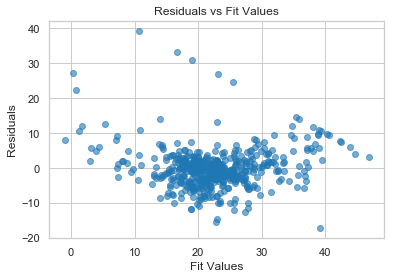

In [48]:

#using the reduced model from part 3 with 3 features, CRIM, RM & PTRATIO, NOT the one-feature model from part 3.
_=plt.scatter(m_3.fittedvalues, m_3.resid, alpha = .6)
plt.ylabel('Residuals')
plt.xlabel('Fit Values')
plt.title('Residuals vs Fit Values')
plt.show()

The plot shows the data points are somewhat clustered in the middle of the plot and symmetrically distributed. There are quite a few data pointsabove 20 on the residual axis that could be considered outliers where the model clearly under predicted the housing price.

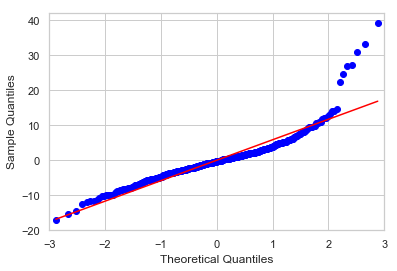

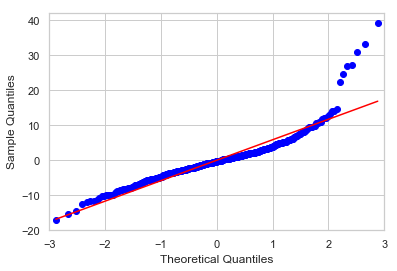

In [49]:
qqplot(m_3.resid, line = 's')

This plot indicates that the residuals are not normal. The model will not accurate predictions are the higher ranges.

The advantages of of the fitted vs. residuals plot, is to visiually see the accuracy of the model with each data point. You can visually see any trends or patterns in your residuals that may need to be corrected. The disadvantage is that you cannot accuratley see if the data is normally distributed or not.

The advantages of the quantile plot show how close the residuals are to a normal distribution. The disadvantage is that you cannot see how accuratetly see any patterns in the data. 

Both of these plots together help verify if the assumption that the errors are normally distributed is violated.

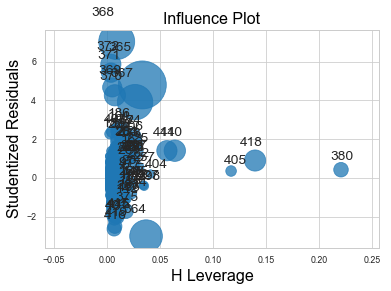

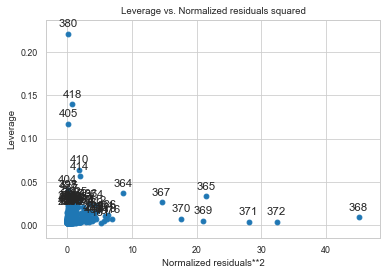

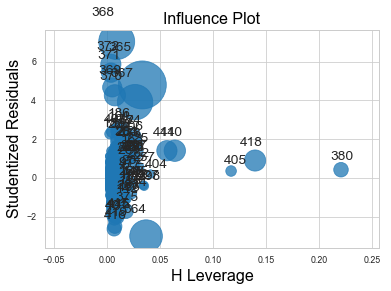

In [50]:
sns.set_context('paper')
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(m_3)
influence_plot(m_3)

There are a few outliers, or high leverage points exerting influence on the regression equation. We can use the OLS get_influence() to find these.

In [51]:
m_3r = m_3.get_influence()
dffits, thres = m_3r.dffits_internal

#filter data points with high leverage
dffits_f = abs(dffits) > thres
outliers = m_3.fittedvalues[dffits_f].index
df = bos.iloc[outliers]
df['F_PRICE'] = m_3.fittedvalues
df['Diff'] = df.F_PRICE - df.PRICE
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,F_PRICE,Diff
145,2.37934,0.0,19.58,0.0,0.8710,6.130,100.0,1.4191,5.0,403.0,14.7,172.91,27.80,13.8,25.661217,11.861217
161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0,35.878935,-14.121065
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0,38.113084,-11.886916
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0,42.406571,-7.593429
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0,39.014237,-10.985763
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0,35.375893,-14.624107
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0,39.345739,-10.654261
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81,48.5,38.858142,-9.641858
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0,40.197073,-9.802927
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0,42.305280,-7.694720


In [52]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,F_PRICE,Diff
count,35.000000,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,13.857709,10.285714,14.976857,0.20000,0.615634,6.566629,83.642857,2.241874,16.942857,533.771429,18.437143,291.246857,12.708000,31.677143,22.534052,-9.143090
std,20.858785,29.128086,6.442039,0.40584,0.103897,1.503583,25.266757,1.326571,9.393185,181.734792,2.482063,144.750560,11.074897,18.217107,14.980067,13.994223
min,0.013810,0.000000,0.460000,0.00000,0.401000,3.561000,17.000000,1.129600,1.000000,193.000000,13.600000,2.600000,1.730000,7.000000,-0.999617,-39.298836
25%,1.491190,0.000000,18.100000,0.00000,0.597000,5.456000,82.950000,1.414750,5.000000,403.000000,16.050000,191.940000,3.715000,14.400000,7.705850,-13.347788
50%,5.669980,0.000000,18.100000,0.00000,0.631000,6.824000,96.200000,1.794000,24.000000,666.000000,20.200000,374.430000,8.880000,27.500000,23.185628,-9.802927
75%,18.291400,0.000000,18.100000,0.00000,0.679000,7.842000,100.000000,2.307350,24.000000,666.000000,20.200000,390.080000,20.350000,50.000000,38.465295,-6.237733
max,88.976200,95.000000,19.580000,1.00000,0.871000,8.780000,100.000000,5.885000,24.000000,666.000000,20.200000,396.900000,37.970000,50.000000,42.406571,17.212383


In [53]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,F_PRICE,Diff
count,35.000000,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,13.857709,10.285714,14.976857,0.20000,0.615634,6.566629,83.642857,2.241874,16.942857,533.771429,18.437143,291.246857,12.708000,31.677143,22.534052,-9.143090
std,20.858785,29.128086,6.442039,0.40584,0.103897,1.503583,25.266757,1.326571,9.393185,181.734792,2.482063,144.750560,11.074897,18.217107,14.980067,13.994223
min,0.013810,0.000000,0.460000,0.00000,0.401000,3.561000,17.000000,1.129600,1.000000,193.000000,13.600000,2.600000,1.730000,7.000000,-0.999617,-39.298836
25%,1.491190,0.000000,18.100000,0.00000,0.597000,5.456000,82.950000,1.414750,5.000000,403.000000,16.050000,191.940000,3.715000,14.400000,7.705850,-13.347788
50%,5.669980,0.000000,18.100000,0.00000,0.631000,6.824000,96.200000,1.794000,24.000000,666.000000,20.200000,374.430000,8.880000,27.500000,23.185628,-9.802927
75%,18.291400,0.000000,18.100000,0.00000,0.679000,7.842000,100.000000,2.307350,24.000000,666.000000,20.200000,390.080000,20.350000,50.000000,38.465295,-6.237733
max,88.976200,95.000000,19.580000,1.00000,0.871000,8.780000,100.000000,5.885000,24.000000,666.000000,20.200000,396.900000,37.970000,50.000000,42.406571,17.212383


There are some interesting values in this set of data. For PTRATIO, TAX, RAD & INDUS features many of the values are similar. It would be worth it to verify these are correct measurements and high leverage points(a combination of unusual values of X) causing the observed outliers. When looking specificaly this model with features CRIM, PTRATIO & RM we see some large differences in CRIM that could account for some of the variability we see in price. Another cause for these high leverage points would be other criteria that would cause the sale of a house at a certain price point. Such as government assisted home buying programs that mandate house prices below the current value of the home, home owners wanting to sell their houses quickly so accepting a price lower than the expected home value.

In [54]:
#removing the outliers with the previous filter
m_3_filt = bos.iloc[m_3.fittedvalues[~dffits_f].index]
m_3_new = ols('PRICE ~ CRIM + RM + PTRATIO',m_3_filt).fit()
print(m_3_new.summary())


                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     455.8
Date:                Mon, 22 Apr 2019   Prob (F-statistic):          2.74e-138
Time:                        16:50:18   Log-Likelihood:                -1310.6
No. Observations:                 471   AIC:                             2629.
Df Residuals:                     467   BIC:                             2646.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1263      2.985     -3.727      0.0

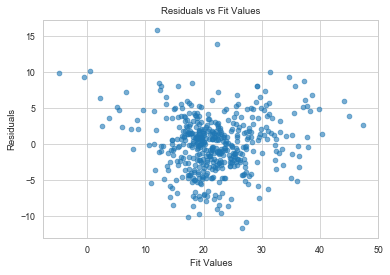

In [55]:
_=plt.scatter(m_3_new.fittedvalues, m_3_new.resid, alpha = .6)
plt.ylabel('Residuals')
plt.xlabel('Fit Values')
plt.title('Residuals vs Fit Values')
plt.show()

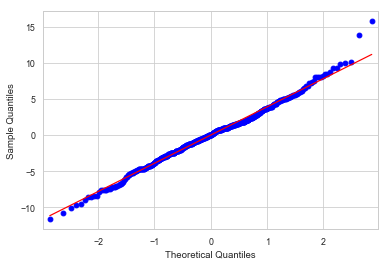

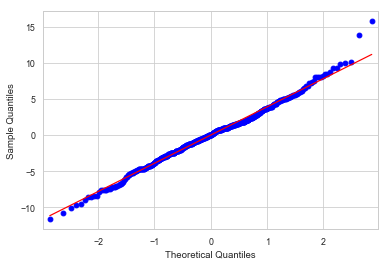

In [56]:
qqplot(m_3_new.resid, line = 's')

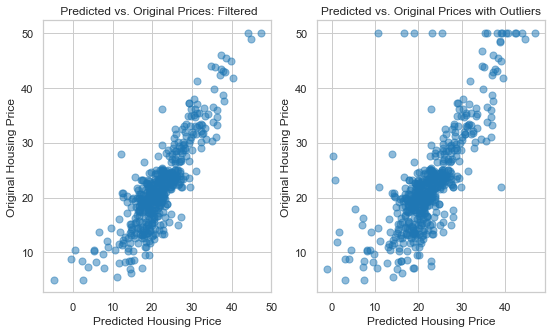

In [57]:

sns.set_context('notebook')
plt.figure(figsize = (9,5))
plt.subplot(1,2,1)
plt.scatter(m_3_new.fittedvalues, m_3_filt.PRICE, s = 50, alpha = .5)
plt.xlabel("Predicted Housing Price")
plt.ylabel("Original Housing Price")
plt.title(" Predicted vs. Original Prices: Filtered")

plt.subplot(1,2,2)
plt.scatter(m_3.fittedvalues, bos.PRICE, s = 50, alpha = .5)
plt.xlabel("Predicted Housing Price")
plt.ylabel("Original Housing Price")
plt.title("Predicted vs. Original Prices with Outliers")
plt.show()

Removing the high leverage points better fit the model. ***R<sup>2</sup>*** goes up from **.594** to .**745**, accounting for **75.5%** of the data. The ***F-statistic*** increased from **245** to **455.8**, and the ***AIC*** decreased from **3232** to **2629** both indicated a much better fit of the model. 

We can see the residual plot is pretty symmetrically distributed and clustering near the middle of the plot, the data is clustered more near the middle of the Y axis and there are not generally clear patterns in the data.

The quantile plot shows that data is roughly normally distributed

Lastly looking at the predicted vs. original price plots, the data has much less variability.

### Cross Validation

In [58]:
from sklearn.model_selection import cross_val_score


df_cv = bos.iloc[m_3.fittedvalues[~dffits_f]]
X_cv = m_3_filt[['CRIM', 'RM', 'PTRATIO']]

lm_cv = LinearRegression()
cv_results = cross_val_score(lm_cv, X_cv, m_3_filt.PRICE, cv = 5 )

print(cv_results)
print(np.mean(cv_results))



[ 0.64574228  0.70130497  0.7279342   0.6221731  -0.09976988]
0.5194769333287601
